# 선형 회귀

나이브베이즈가 분류 작업을 위한 좋은 시작점이 것처럼 선형 회귀 모델은 회귀 작업의 좋은 시작점이다. 선형 회귀 모델은 매우 빠르게 적합되며 해석하기가 아주 쉽기 때문에 인기가 많다. 가장 간단한 형태의 선형 회귀 모델에 익숙하겠지만 그러한 모델을 확장하면 조금 더 복잡한 데이터 행위를 모델링할 수 있다. 

이번 절에서는 우선 다음의 유명한 문제의 수학적 배경에 대해 간단하게 검토하고 나서 데이터에 좀 더 복잡한 패턴을 설명하기 위해 어떻게 선형 모델을 일반호하는지 알아보겠다. 먼저 표준 임포트로 시작하자.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## 단순 선형 회귀

먼저 가장 친숙한 선형 회귀, 즉 데이터에 대한 직선 적합을 알아보자. 직선 적합은 $y = ax + b$ 형식의 모델로, 보통 $a$를 기울기, $b$를 절편이라고 한다.

기울기가 2고 절편이 -5인 선 주변에 흩어져 있는 다음 데이터를 생각해보자. 

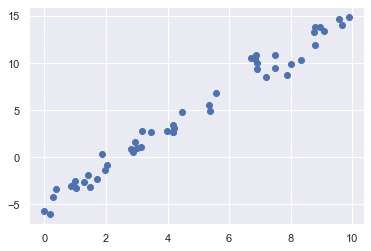

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

scikit-learn의 `LinearRegression` 추정기를 이용해 이 데이터를 적합시키고 가장 잘 적합하는 선을 구성할 수 있다.

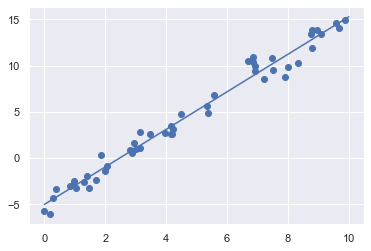

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

데이터의 기울기와 절편은 모델의 적합 모수에 포함되는데, Scikit-learn에서 이 모수는 항상 맨 뒤에 밑줄을 붙여 표시한다. 이 모델에 관련된 모수는 `coef_`와 `inercept_`다.

In [4]:
print("Model slope : ", model.coef_[0])
print("Model intercept : ", model.intercept_)

Model slope :  2.027208810360695
Model intercept :  -4.998577085553202


바라던대로 입력갑과 매우 가까운 것을 확인할 수 있다.

그러나 `LinearRegression` 추정기는 이보다 훨씬 더 많은 일을 할 수 있다. 단순한 직선 적합 외에 다음 형태의 다차원 직선 모델도 처리할 수 있다.

$$ y = a_0 + a_1 x_1 + a_2 x_2 + ... $$

여기에는 여러 개의 $x$ 값이 있다. 기하학적으로 이것은 평면을 3차원 점에 적합시키거나 초평면을 그보다 높은 차원의 점에 적합시키는 것과 유사하다.

이러한 회귀의 다차원적 성격이 시각화를 더 어렵게 만들지만, Numpy의 행렬 곱셈 연산자를 이용해 이제 데이터를 만들어서 실제로 이러한 적합 중 하나를 확인할 수 있다.

In [5]:
rng = np.random.RandomState(1)

X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2, 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000153
[ 1.5 -2.   1. ]


여기서 $y$ 데이터는 임의의 $x$값 3개로부터 구성되며, 선형 회귀는 데이터를 구성하는데 사용된 계수를 찾아낸다.

이러한 방식으로 하나의 `LinearRegression` 추정기를 사용해 선이나 면, 초평면을 데이터에 적합시킬 수 있다. 이 접근 방식이 변수들 사이의 선형 관계에 엄격히 제한되는 듯 보이지만, 이 점은 크게 걱정하지 않아도 된다. 